网络分析

节点为miRNA,权重为比值

任务：
    进行图分类

## miRNA:miRNA间接互作网络统计

In [1]:
# !pip install igraph==0.9.11
# !pip install pycairo

In [2]:
import numpy as np
import pandas as pd

import networkx as nx
import igraph as ig

from matplotlib import pyplot as plt

In [3]:
df_miR_inter = pd.read_csv('../../result/miR_interplay/miR_interplay_literature.csv',index_col=0)
print(df_miR_inter.shape)
df_miR_inter.head()

(60730, 7)


,miRNA,Target Gene,References (PMID),TF name,miRNA name,Action type,SRAID/PMID
0,hsa-miR-20a-5p,HIF1A,18632605,HIF1A,hsa-let-7a,Activation,23426184
1,hsa-miR-20a-5p,HIF1A,18632605,HIF1A,hsa-mir-101,Repression,20478051
2,hsa-miR-20a-5p,HIF1A,18632605,HIF1A,hsa-mir-103,Activation,23426184
3,hsa-miR-20a-5p,HIF1A,18632605,HIF1A,hsa-mir-127,Regulation,22962609
4,hsa-miR-20a-5p,HIF1A,18632605,HIF1A,hsa-mir-1275,Activation,25129238


**生成miRNA对**

注意：

1. 存在不同的的TF介导的相同的作用
2. 存在 a-b、b-a 自环

删除重复TF介导的

In [4]:
df_miR_inter.drop_duplicates(subset=['miRNA','miRNA name'],inplace=True)
print(df_miR_inter.shape)
df_miR_inter.head()

(51770, 7)


,miRNA,Target Gene,References (PMID),TF name,miRNA name,Action type,SRAID/PMID
0,hsa-miR-20a-5p,HIF1A,18632605,HIF1A,hsa-let-7a,Activation,23426184
1,hsa-miR-20a-5p,HIF1A,18632605,HIF1A,hsa-mir-101,Repression,20478051
2,hsa-miR-20a-5p,HIF1A,18632605,HIF1A,hsa-mir-103,Activation,23426184
3,hsa-miR-20a-5p,HIF1A,18632605,HIF1A,hsa-mir-127,Regulation,22962609
4,hsa-miR-20a-5p,HIF1A,18632605,HIF1A,hsa-mir-1275,Activation,25129238


In [5]:
data = df_miR_inter[['miRNA','miRNA name']]
data.columns = ['source','target']

In [6]:
g = ig.Graph.DataFrame(data,directed=True, vertices=None, use_vids=False)


In [7]:
num_node = g.vcount()
num_edge = g.ecount()
print(f'节点数{num_node},\n连边数{num_edge}')

节点数2519,
连边数51770


In [8]:
g.degree() # 度

[334,
 509,
 198,
 169,
 3,
 17,
 19,
 140,
 403,
 6,
 127,
 477,
 10,
 96,
 167,
 57,
 62,
 101,
 173,
 31,
 6,
 12,
 64,
 204,
 3,
 44,
 176,
 38,
 89,
 2,
 31,
 27,
 118,
 34,
 9,
 55,
 18,
 17,
 36,
 144,
 56,
 165,
 55,
 1,
 42,
 107,
 41,
 8,
 13,
 8,
 8,
 42,
 4,
 8,
 8,
 13,
 13,
 26,
 26,
 6,
 3,
 22,
 10,
 2,
 3,
 16,
 3,
 69,
 8,
 31,
 40,
 3,
 61,
 5,
 30,
 7,
 16,
 79,
 17,
 5,
 3,
 23,
 81,
 37,
 78,
 1,
 5,
 5,
 9,
 8,
 169,
 31,
 1,
 3,
 18,
 1,
 66,
 4,
 47,
 72,
 11,
 3,
 7,
 6,
 32,
 16,
 10,
 7,
 7,
 5,
 7,
 77,
 136,
 55,
 7,
 129,
 66,
 60,
 42,
 58,
 34,
 4,
 1,
 57,
 6,
 11,
 6,
 2,
 2,
 8,
 3,
 11,
 4,
 6,
 2,
 3,
 14,
 55,
 5,
 14,
 2,
 25,
 9,
 8,
 1,
 47,
 10,
 32,
 3,
 87,
 10,
 4,
 2,
 57,
 5,
 7,
 5,
 24,
 30,
 1,
 4,
 7,
 35,
 73,
 1,
 3,
 7,
 14,
 61,
 7,
 55,
 5,
 19,
 3,
 11,
 11,
 1,
 39,
 21,
 28,
 16,
 3,
 5,
 92,
 113,
 18,
 23,
 24,
 40,
 39,
 18,
 31,
 41,
 3,
 19,
 13,
 14,
 14,
 38,
 5,
 81,
 6,
 60,
 3,
 6,
 69,
 51,
 37,
 119,
 31,
 66,
 11,

In [9]:
print(g.degree_distribution())

N = 2519, mean +- sd: 41.1036 +- 78.8749
Each * represents 2 items
[  1,   2): ************************************************************ (120)
[  2,   3): *********************************************************************** (143)
[  3,   4): ****************************************************************** (133)
[  4,   5): ******************************************* (87)
[  5,   6): ****************************************** (84)
[  6,   7): ************************************ (73)
[  7,   8): *************************************************** (102)
[  8,   9): ******************************************* (86)
[  9,  10): *************************************** (78)
[ 10,  11): ************************************ (72)
[ 11,  12): ************************************ (73)
[ 12,  13): ******************** (41)
[ 13,  14): ************************ (48)
[ 14,  15): ***************************** (59)
[ 15,  16): *********************** (47)
[ 16,  17): *********************** (46)

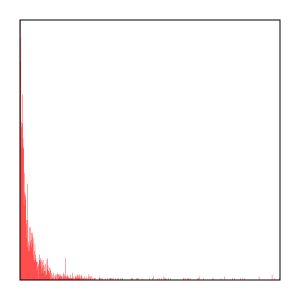

In [10]:
# 度分布直方图
# print(g.degree_distribution())
ig.plot(g.degree_distribution(bin_width=1), bbox=(300,300))

In [13]:
from collections import Counter

In [16]:
degree_count = dict(Counter(g.degree()))
degree_count

{334: 1,
 509: 2,
 198: 2,
 169: 3,
 3: 133,
 17: 44,
 19: 33,
 140: 1,
 403: 1,
 6: 73,
 127: 3,
 477: 1,
 10: 72,
 96: 4,
 167: 2,
 57: 11,
 62: 6,
 101: 1,
 173: 2,
 31: 21,
 12: 41,
 64: 7,
 204: 2,
 44: 14,
 176: 2,
 38: 23,
 89: 4,
 2: 143,
 27: 16,
 118: 2,
 34: 26,
 9: 78,
 55: 14,
 18: 31,
 36: 26,
 144: 3,
 56: 11,
 165: 3,
 1: 120,
 42: 10,
 107: 4,
 41: 16,
 8: 86,
 13: 48,
 4: 87,
 26: 19,
 22: 18,
 16: 46,
 69: 8,
 40: 11,
 61: 11,
 5: 84,
 30: 29,
 7: 102,
 79: 12,
 23: 33,
 81: 5,
 37: 20,
 78: 6,
 66: 11,
 47: 10,
 72: 9,
 11: 73,
 32: 22,
 77: 11,
 136: 3,
 129: 2,
 60: 8,
 58: 12,
 14: 59,
 25: 16,
 87: 6,
 24: 21,
 35: 24,
 73: 2,
 39: 14,
 21: 53,
 28: 29,
 92: 3,
 113: 2,
 51: 7,
 119: 2,
 46: 12,
 48: 10,
 102: 3,
 83: 4,
 110: 3,
 91: 2,
 52: 1,
 70: 5,
 43: 20,
 180: 1,
 67: 8,
 163: 1,
 170: 1,
 54: 8,
 15: 47,
 116: 2,
 29: 19,
 125: 3,
 117: 2,
 68: 4,
 63: 4,
 53: 9,
 50: 10,
 137: 1,
 33: 18,
 131: 1,
 84: 7,
 112: 3,
 164: 3,
 123: 4,
 175: 3,
 82: 5,
 45

Text(0, 0.5, 'Number of nodes')

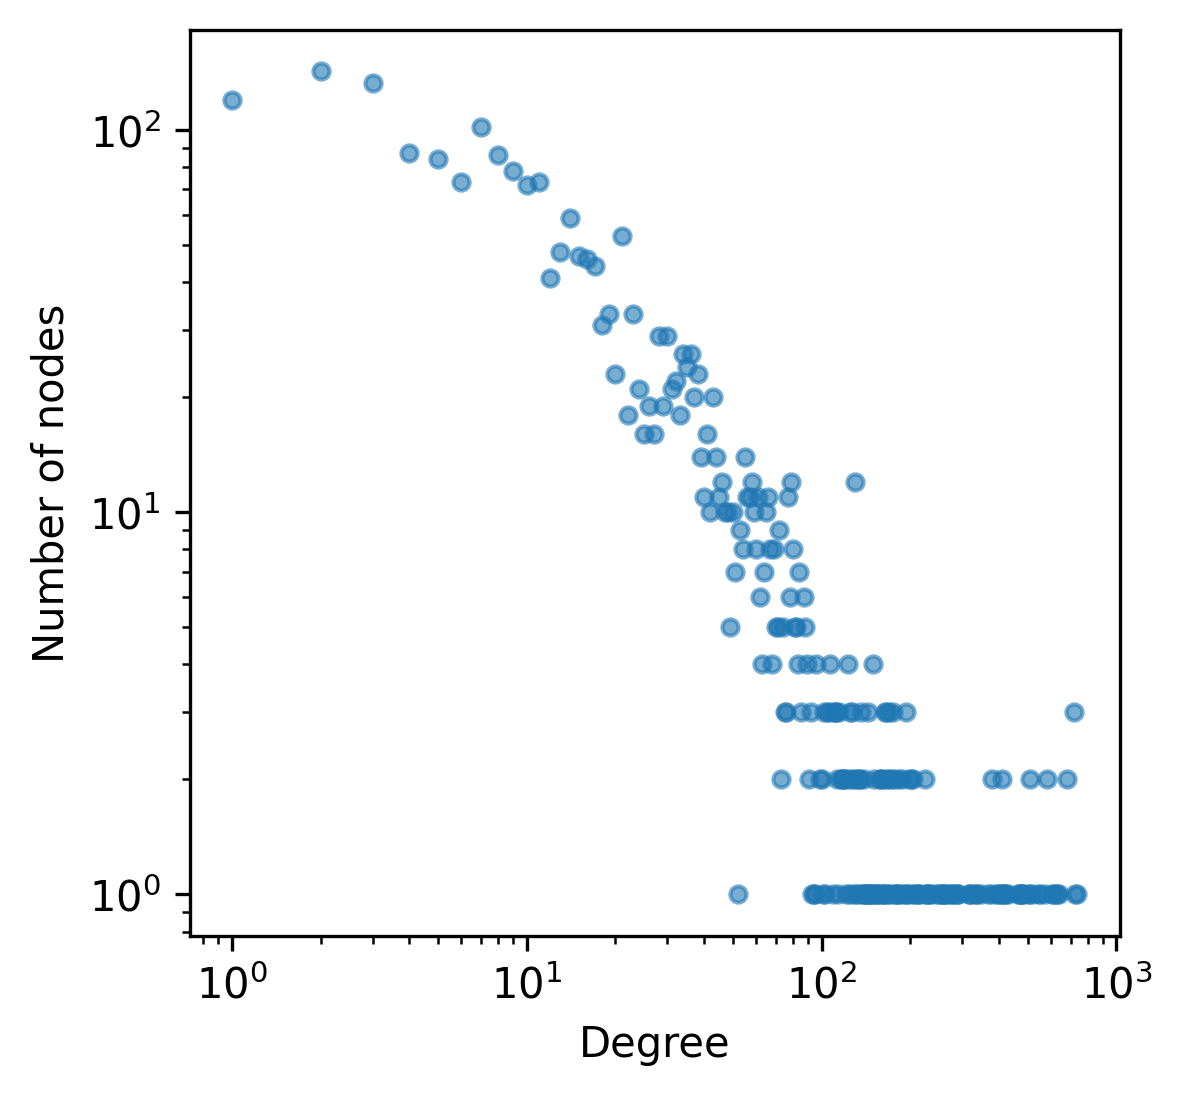

In [31]:
plt.figure(figsize=(4,4),dpi=300)
plt.scatter(degree_count.keys(),degree_count.values(),alpha=0.6,s=15)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Degree')
plt.ylabel('Number of nodes')
# plt.grid()


In [12]:
sorted(g.degree())

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
